# Modelling functions
## Beginners Guide to Modelling Functions

# Table of Contents

- Introduction
- Linear models
- Quadratic models
- Cubic models
- Exponential models
- Logarithmic models
- Sinusoidal models
- Logistic models

# Introduction

We are going to draw a scatter graph and model a regression line from linear to logistic on Jupyter Notebook. You can find all the codes in this [repo](https://nbviewer.jupyter.org/github/shinokada/python-for-ib-diploma-mathematics/blob/master/Modelling_functions.ipynb). If this is the first time you use the Jupyter Notebook, please read [this article](https://towardsdatascience.com/beginners-guide-to-jupyter-notebook-8bb85b85085?source=friends_link&sk=83bbd7201d6010e95f10b7c8e04d6545)

# Linear models

$
y=mx+c
$

The first one is a linear model. A linear model is express as $y=mx+c$.
We are going to use [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) or [numpy.arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html?highlight=arange#numpy.arange) to create data. If you want to read more about linear relationship, please read [A Measure of Linear Relationship](https://towardsdatascience.com/a-measure-of-linear-relationship-5dd4a995ee7e?source=friends_link&sk=a68b5bc35334e5a501ead9900f0ea5db).

We import Python libraries `numpy` and `matplotlib`. We create year and co2 array.

In [114]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

year=np.array([1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000])
co2=np.array([338.7,341.1,344.4,347.2,351.5,354.2,356.4,358.9,362.6,366.6,369.4])

First, we create a scatter plot using matplotlib. Add the title, label, x, and y-axis labels. You need to use `show()` method. You can plot without it but this will remove unnecessary outputs.

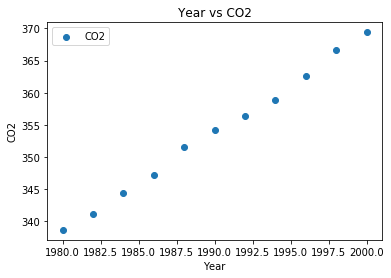

In [115]:
plt.scatter(year,co2,label='CO2')
plt.title("Year vs CO2")
plt.xlabel('Year')
plt.ylabel('CO2')
plt.legend()
plt.show()

## Integers in the x-axis

As you can see in the above graph, you have decimals in the x-axis. We use the first three lines to make them integers in the following codes.

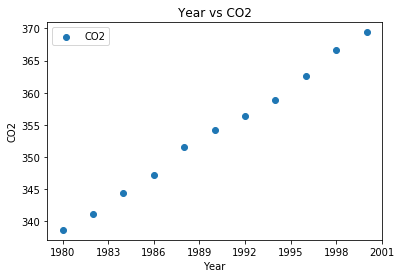

In [116]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.scatter(year,co2,label='CO2')
plt.title("Year vs CO2")
plt.xlabel('Year')
plt.ylabel('CO2')
plt.legend()
plt.show()

## Finding a Linear model with scikit-learn

We are going to use the [scikit-learn](https://scikit-learn.org/stable/). 
One way to find the regression slope and intercept is to use [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). This class requires the x values to be one column. We modify year data using `reshape(-1,1)`. The original year data has 1 by 11 shape. You need to reshape the year data to 11 by 1.

In [117]:
year1=year.reshape((-1,1))
print(np.shape(year))
print(np.shape(year1))

(11,)
(11, 1)


We import [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), reshape the year data, fit our data using `LinearRegression().fit()`. This will return the slope, `coef_` and the y-intercept, `intercept_`. `coef_` returns an array, so we take the first item by using `reg.coef_[0]`. Let's print out our regression line equation.

In [130]:
from sklearn.linear_model import LinearRegression

year1=year.reshape((-1,1))

reg = LinearRegression().fit(year1,co2) 

slope=reg.coef_[0]
intercept=reg.intercept_

print(f'The equation of regression line is y={slope:.3f}x+{intercept:.3f}.')


The equation of regression line is y=1.538x+-2707.255.


## All together

We draw a scatter plot and our linear regression line together. We use a new x domain from 1975 to 2005 taking 100 samples for the regression line, `np.linspace(1975,2005,100)`. Then using x domain, slope and y-intercept to draw a regression line.

$y=mx+c$

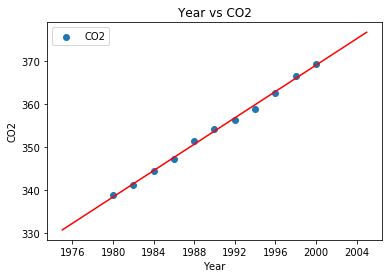

The equation of regression line is y=1.538x+-2707.255.


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.linear_model import LinearRegression
%matplotlib inline

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

year=np.array([1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000])
co2=np.array([338.7,341.1,344.4,347.2,351.5,354.2,356.4,358.9,362.6,366.6,369.4])

year1=year.reshape((-1,1))

reg = LinearRegression().fit(year1,co2) 
slope=reg.coef_[0]
intercept=reg.intercept_

plt.scatter(year,co2,label='CO2')
X_plot = np.linspace(1975,2005,100)
Y_plot = slope*X_plot+intercept
plt.plot(X_plot, Y_plot, color='r')
plt.title("Year vs CO2")
plt.xlabel('Year')
plt.ylabel('CO2')
plt.legend()
plt.show()

print(f'The equation of regression line is y={slope:.3f}x+{intercept:.3f}.')

## Finding a Linear model with scipy

Another way to find the regression slope and intercept is to use [`scipy.stats.linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html). This returns `slope, intercept, rvalue, pvalue, stderr`. 

In [7]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(year,co2)
print(f'The equation of regression line is y={slope:.3f}x+{intercept:.3f}.')


The equation of regression line is y=1.538x+-2707.255.


## Linear Regression Graph

To draw a line we need x points. We use `np.linspace` which is `numpy.linspace` since we used `import numpy as np`. Our data is from 1975 to 2000. So let's use 1960 for `start`, 2005 for `stop` and 100 for the number of samples.

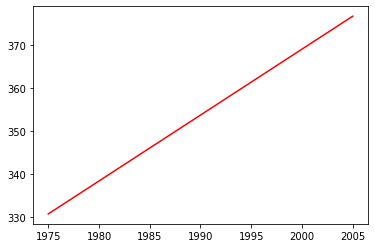

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

year=np.array([1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000])
co2=np.array([338.7,341.1,344.4,347.2,351.5,354.2,356.4,358.9,362.6,366.6,369.4])

X_plot = np.linspace(1975,2005,100)
Y_plot = slope*X_plot+intercept
plt.plot(X_plot, Y_plot, color='r')
plt.show()

Now we put a scatter plot, regression line and a regression equation together.

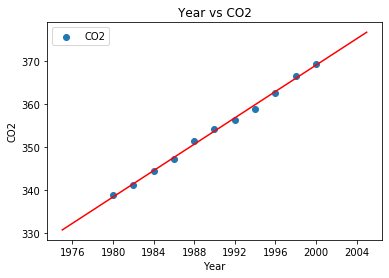

The equation of regression line is y=1.538x+-2707.255.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import linregress
%matplotlib inline

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

year=np.array([1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000])
co2=np.array([338.7,341.1,344.4,347.2,351.5,354.2,356.4,358.9,362.6,366.6,369.4])

slope, intercept, r_value, p_value, std_err = linregress(year,co2)
X_plot = np.linspace(1975,2005,100)
Y_plot = slope*X_plot+intercept
plt.plot(X_plot, Y_plot, color='r')

plt.scatter(year,co2,label='CO2')
plt.title("Year vs CO2")
plt.xlabel('Year')
plt.ylabel('CO2')
plt.legend()
plt.show()

print(f'The equation of regression line is y={slope:.3f}x+{intercept:.3f}.')


## Practice 1

Use the following data to graph a scatter plot and regression line. Find a linear regression equation.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

temp = np.array([55,60,65,70,75,80,85,90])
rate = np.array([45,80,92,114,141,174,202,226])

## Answer

Did you draw a scatter and regression graph? The regression line should be $y=5.119x-236.88$.

# Quadratic models

$
y=ax^2+bx+c
$

We use Numpy's `arange` to create 10 integers from 0 to 9.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

time = np.arange(10)
height = np.array([450,445,430,409,375,331,280,215,144,59])


Let's plot the above data.

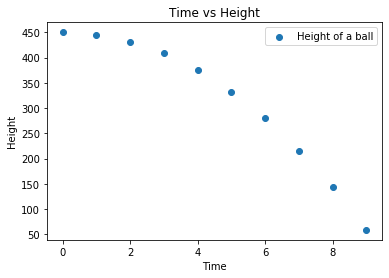

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

time = np.arange(10)
height = np.array([450,445,430,409,375,331,280,215,144,59])

plt.scatter(time,height,label='Height of a ball')
plt.title("Time vs Height")
plt.xlabel('Time')
plt.ylabel('Height')
plt.legend()
plt.show()

## numpy.polyfit & poly1d

`numpy.polyfit` fits a polynomial. It requires x, y and degree of the fitting polynomial. 2 for a quadratic, 3 for a cubic, etc.  It returns an array with polynomial coefficients from a higher power to the constant. For a quadratic function, these are a, b and c in $ax^2+bx+c$.

$y=𝑎𝑥^2+𝑏𝑥+𝑐$

In [13]:
coef = np.polyfit(time, height, 2)
coef

array([ -4.93939394,   1.23030303, 449.03636364])

Let's print out the quadratic regression line.

In [14]:
print(f'The equation of regression line is y={coef[0]:.3f}x^2+{coef[1]:.3f}x+{coef[2]:.3f}.')

The equation of regression line is y=-4.939x^2+1.230x+449.036.


The numpy's `poly1d` can be used with the `polyfit`. In our case, we use `np.poly1d(coefficients)`. This will return a polynomial equation using our coefficient.

In [15]:
equ = np.poly1d(coef)

We can find a value for any x. For example, if you want to find y value when x=1:

In [16]:
equ(1)

445.3272727272727

We use this to draw our regression line. We defined time from 0 to 9, so we use it.

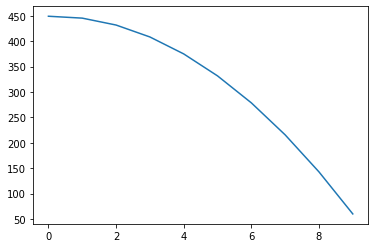

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

y = equ(time)
plt.plot(time, y)
plt.show()

We put all together.

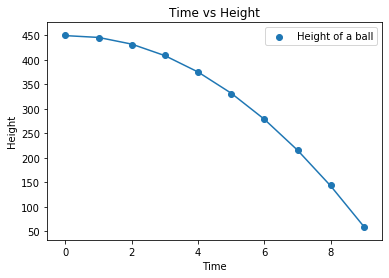

The equation of regression line is y=-4.939x^2+1.230x+449.036.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

time = np.arange(10)
height = np.array([450,445,430,409,375,331,280,215,144,59])

coef = np.polyfit(time, height, 2)
equ = np.poly1d(coef)
y = equ(time)
plt.plot(time, y)

plt.scatter(time,height,label='Height of a ball')
plt.title("Time vs Height")
plt.xlabel('Time')
plt.ylabel('Height')
plt.legend()
plt.show()

a, b, c = coef
print(f'The equation of regression line is y={a:.3f}x^2+{b:.3f}x+{c:.3f}.')

## Practice 2

By using the following data, draw a scatter plot and regression line in a graph. Find the quadratic regression equation.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

angle = np.arange(20,80,10)
distance = np.array([371,465,511,498,439,325])

## Answer

Could you draw a scatter and regression line? The quadratic equation should be 

$y=-0.2607x^2+22.547x+24.2$

# Cubic models



 $y=ax^3+bx^2+cx+d$

You can use the same method as the quadratic function above. We are going to use `plyfit` and `poly1d`. First, we prepare the data. And let's draw a scatter plot.

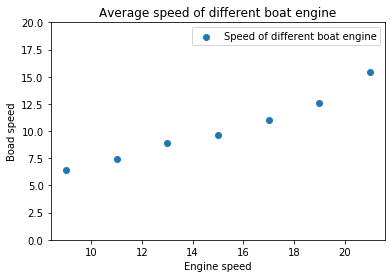

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

engspeed = np.arange(9,23,2)
avespeed = np.array([6.45,7.44,8.88,9.66,10.98,12.56,15.44])

plt.scatter(engspeed,avespeed,label='Speed of different boat engine')

plt.title("Average speed of different boat engine")
plt.xlabel('Engine speed')
plt.ylabel('Boad speed')
plt.ylim(0,20)
plt.legend()
plt.show()

Using `polyfit` returns coefficients. For a cubic function, a, b, c, and d in:

In [21]:
coef = np.polyfit(engspeed, avespeed, 3)
print(coef)

[ 6.14583333e-03 -2.43139881e-01  3.67563988e+00 -1.15036458e+01]


We put all together.

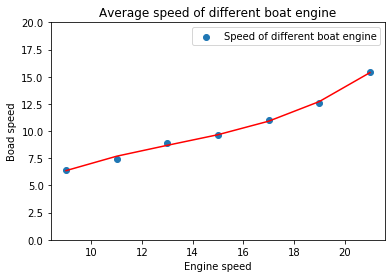

The equation of regression line is y=0.006x^3+-0.243x^2+3.676x+-11.5036458333338.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

engspeed = np.arange(9,23,2)
avespeed = np.array([6.45,7.44,8.88,9.66,10.98,12.56,15.44])

plt.scatter(engspeed,avespeed,label='Speed of different boat engine')

coef = np.polyfit(engspeed, avespeed, 3)
equ = np.poly1d(coef)
y = equ(engspeed)
plt.plot(engspeed, y,'r-')

plt.title("Average speed of different boat engine")
plt.xlabel('Engine speed')
plt.ylabel('Boad speed')
plt.ylim(0,20)
plt.legend()
plt.show()

a, b, c, d = coef
print(f'The equation of regression line is y={a:.3f}x^3+{b:.3f}x^2+{c:.3f}x+{d}.')


## Practice 3

Draw a scatter plot and a cubic regression line using the following data. Print the cubic equation.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(1,8)
y=np.array([0,0.012,0.06,0.162,0.336,0.6,0.972])


## Answer

Could you plot a scatter and a regression line? The regression line equation should be 

$y=0.003x^3+0.009x+0.006$ 

The coefficients are [ 3.00000000e-03, -1.16796094e-16, -9.00000000e-03,  6.00000000e-03]. These means 

$3\cdot10^{-3}, -1.167\cdot10^{-16}, -9\cdot10^{-3}, 6\cdot10^{-3}$. 

The second coefficient is practically 0.

In [24]:
print(300e-03)
print(300*10**(-3))

0.3
0.3


# Exponential models


We are going to explore three exponential models.

$y=a\cdot e^{-bx}+c \\
y=a\cdot e^{-bx} \\
y=a\cdot b^x$

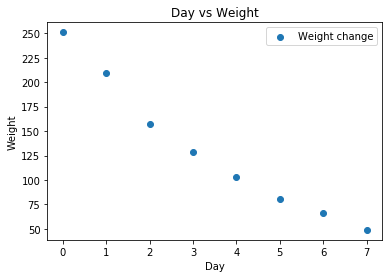

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

day = np.arange(0,8)
weight = np.array([251,209,157,129,103,81,66,49])

plt.scatter(day,weight,label='Weight change')
plt.title("Day vs Weight")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()

 We are going to use [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). This requires a function, x and y values, and initial values, `p0` in array form. Finding proper `p0` is a bit of trial and error. You have to test different values. We use `p0=(1, 1e-6, 1)`.
 
It returns optimal values for the parameters and the estimated covariance of popt.

## $a\cdot e^{-bx}+c$

Our first exponential function uses a, b, and c.
We are going to define a function first. This is used in the `curve_fit` method.

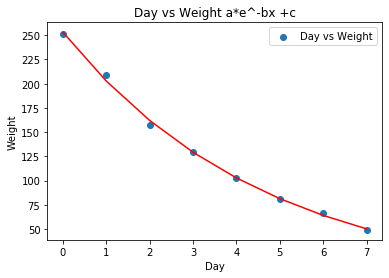

The equation of regression line is y=261.33e^(0.21x)+-8.24


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, day, weight, p0=[1, 1e-6, 1])
plt.plot(day, func(day, *popt), 'r-')

plt.scatter(day,weight,label='Day vs Weight')
plt.title("Day vs Weight a*e^-bx +c")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()

# equation
a=popt[0].round(2)
b=popt[1].round(2)
c=popt[2].round(2)

print(f'The equation of regression line is y={a}e^({b}x)+{c}')


## $a\cdot e^{-bx}$

The second function uses a and b. We define the function accordingly.

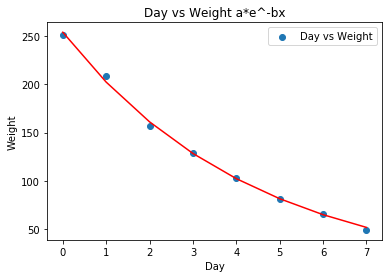

The equation of regression line is y=254.05e^(0.23x)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

def func2(x, a, b):
    return a * np.exp(-b * x)

popt, pcov = curve_fit(func2, day, weight, p0=[1, 1e-6])
plt.plot(day, func2(day, *popt), 'r-')

plt.scatter(day,weight,label='Day vs Weight')
plt.title("Day vs Weight a*e^-bx")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()

# equation
a=popt[0].round(2)
b=popt[1].round(2)

print(f'The equation of regression line is y={a}e^({b}x)')


## $a\cdot b^x$

The last exponential function uses a and b. We modify the function accordingly.

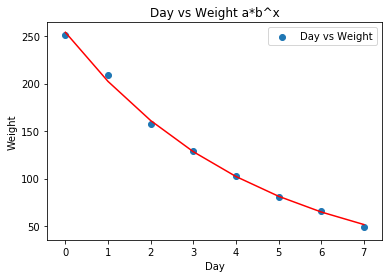

The equation of regression line is y=254.0486*0.7964^x


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

def func3(x, a, b):
    return a * b ** x

popt, pcov = curve_fit(func3, day, weight, p0=[1, 1e-6])
plt.plot(day, func3(day, *popt), 'r-')

plt.scatter(day,weight,label='Day vs Weight')
plt.title("Day vs Weight a*b^x")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()

# equation
a=popt[0].round(4)
b=popt[1].round(4)

print(f'The equation of regression line is y={a}*{b}^x')


## Comparing with TI Nspire result

TI Nspire's Exponential regression fits the model equation $y=ab^x$ to the data using a least-squares fit on transformed values x and $ln(y)$.

<center><img src="image/expo.png"></center>

## Practice

Using the following data find an exponential function in the form of ab^x. Plot a scatter diagram and draw a regression line.

In [103]:
import numpy as np

week = np.arange(1,21)
views = np.array([102365, 38716,21617,24305,9321,14148,2103,8285,5098,3777,831,1007,834,34,378,204,6,42,54,31])
print(views)

[102365  38716  21617  24305   9321  14148   2103   8285   5098   3777
    831   1007    834     34    378    204      6     42     54     31]


## Answer



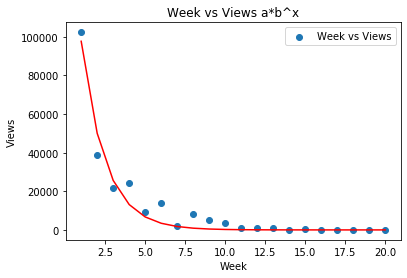

The equation of regression line is y=190737.04x0.51^x


In [108]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

def func(x, a, b):
    return a * b**x 

popt, pcov = curve_fit(func, week, views, p0=[100000, 0.5])
plt.scatter(week,views,label='Week vs Views')
plt.plot(week, func(week, *popt), 'r-')
plt.title("Week vs Views a*b^x")
plt.xlabel('Week')
plt.ylabel('Views')
plt.legend()
plt.show()
# equation
a=popt[0].round(2)
b=popt[1].round(2)

# print(pcov)

print(f'The equation of regression line is y={a}x{b}^x')

$190737\cdot 0.51^x$

# Logarithmic models

## Semi-log models

$
Y=A+Bx, A=ln(y), 
$

Generally, we use the semi-log model for an exponential function. The following shows how to convert an exponential function to a linear function by taking a natural log.


$
y=a\cdot b^x \\
ln(y)=ln(a\cdot b^x) \\
ln(y)=ln(a)+xln(b)\\
Y=A+Bx \\ 
\text{where }Y=ln(y), A=ln(a), B=ln(b) 
$

We set up our mock data and plot a scatter diagram.

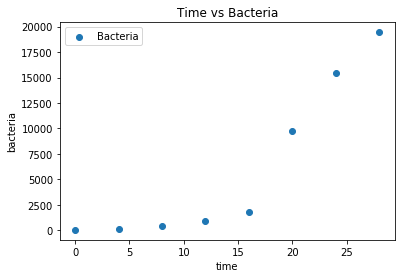

In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

time = np.arange(0,30,4)
bacteria = np.array([20,150,453,920,1820,9765,15487,19450])

plt.scatter(time,bacteria,label='Bacteria')
plt.title("Time vs Bacteria")
plt.xlabel('time')
plt.ylabel('bacteria')
plt.legend()
plt.show()

We are going to take a natural log for the bacteria values by using [`numpy.log`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html). `numpy.log` is the natural logarithm. This should show rather a linear trend. We need to modify the title and y label with `ln(bacteria)`.

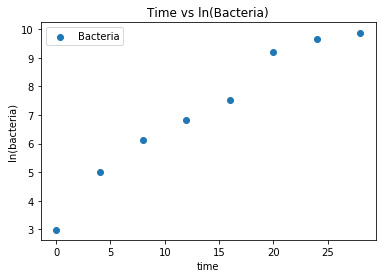

In [148]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

time = np.arange(0,30,4)
bacteria = np.array([20,150,453,920,1820,9765,15487,19450])

plt.scatter(time,np.log(bacteria),label='Bacteria')
plt.title("Time vs ln(Bacteria)")
plt.xlabel('time')
plt.ylabel('ln(bacteria)')
plt.legend()
plt.show()

We use `numpy.polyfit` which we used in a quadratic and cubic function. We use `1` in `numpy.polyfit()` so that it will return a linear regression. `numpy.polyfit` returns all coefficients for our equation.

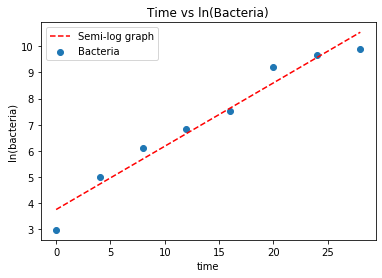

The equation of regression line is y=0.242 * x + 3.760


In [149]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

time = np.arange(0,30,4)
bacteria = np.array([20,150,453,920,1820,9765,15487,19450])

p = np.polyfit(time, np.log(bacteria), 1)
plt.plot(time, p[0] * time + p[1], 'r--', label='Semi-log graph')

plt.scatter(time,np.log(bacteria),label='Bacteria')
plt.title("Time vs ln(Bacteria)")
plt.xlabel('time')
plt.ylabel('ln(bacteria)')
plt.legend()
plt.show()

print(f'The equation of regression line is y={p[0]:.3f} * x + {p[1]:.3f}')

## Log-log models

Log-log model is used for a power function.



$
y=a\cdot x^b \\
ln(y)=ln(a\cdot x^b) \\
ln(y)=ln(a)+bln(x)\\
Y=MX+C \\
\text{where }Y=ln(y), X=ln(x), C=ln(a)
$

Let's set up data and plot a scatter diagram.

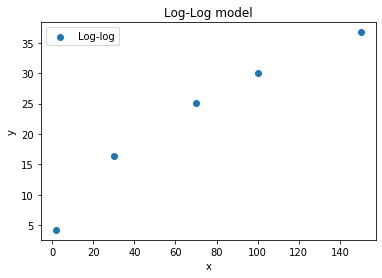

In [135]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.array([2,30,70,100,150])
y=np.array([4.24,16.4,25.1,30,36.7])

plt.scatter(x,y,label='Log-log')
plt.title("Log-Log model")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

We take a natural log for x and y values using [`numpy.log`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) in `numpy.polyfit`. We need to modify the x and y label to ln(x) and ln(y).

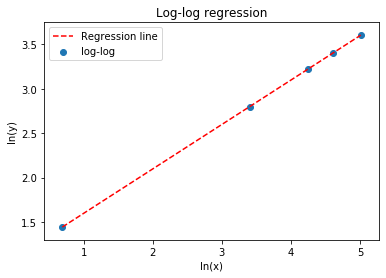

The equation of regression line is ln(y)=0.500 * ln(x) + 1.098


In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.array([2,30,70,100,150])
y=np.array([4.24,16.4,25.1,30,36.7])

p = np.polyfit(np.log(x), np.log(y), 1)
plt.plot(np.log(x), p[0] * np.log(x) + p[1], 'r--', label='Regression line')

plt.scatter(np.log(x),np.log(y),label='log-log')
plt.title("Log-log regression")
plt.xlabel('ln(x)')
plt.ylabel('ln(y)')
plt.legend()
plt.show()


print(f'The equation of regression line is ln(y)={p[0]:.3f} * ln(x) + {p[1]:.3f}')

## Practice





In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline





[ 1  2  3  4  5  6  7  8  9 10 11]
[17.1 17.6 15.7 15.2 13.3 11.  10.7 10.3 12.  13.7 13.1]


## Answer



# Sinusoidal models

Let's try a sinusoidal function. We set our data and plot a scatter graph. Since we are going to use `scipy.optimize.curve_fit`, let's import it as well. We used it in the exponential models. We set up our data and draw a scatter plot.

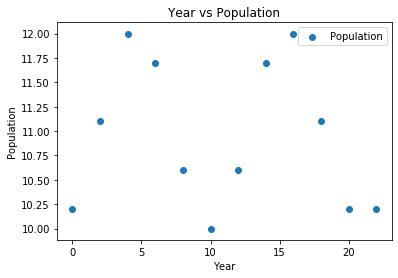

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

year=np.arange(0,24,2)
population=np.array([10.2,11.1,12,11.7,10.6,10,10.6,11.7,12,11.1,10.2,10.2])

plt.scatter(year,population,label='Population')
plt.title("Year vs Population")
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

We define a function called `sinfunc`. This takes parameters `x, a, b, c, d`. We use [`numpy.radians`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.radians.html) for `c`.

$
y=a\cdot sin(b\cdot (x-c))+d \\
a: \text{Amplitude} \\
b = \frac{2\pi}{Period} \\
c: \text{Phase shift} \\
d: \text{Vertical translation}
$

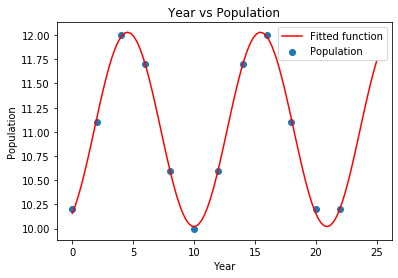

The equation of regression line is y=1.005 * sin(0.575(x-1.810))+11.025


In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

year=np.arange(0,24,2)
population=np.array([10.2,11.1,12,11.7,10.6,10,10.6,11.7,12,11.1,10.2,10.2])


def sinfunc(x, a, b, c, d):
    return a * np.sin(b * (x - np.radians(c)))+d

popt, pcov = curve_fit(sinfunc, year, population, p0=[1,0.4,1,5])
x_data = np.linspace(0, 25, num=100)

plt.scatter(year,population,label='Population')
plt.plot(x_data, sinfunc(x_data, *popt), 'r-',label='Fitted function')
plt.title("Year vs Population")
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

a, b, c, d = popt

print(f'The equation of regression line is y={a:.3f} * sin({b:.3f}(x-{np.radians(c):.3f}))+{d:.3f}')



## Practice

Using [the table below](https://niwa.co.nz/education-and-training/schools/resources/climate/modelling), draw a scatter plot and find cosine regression function.

<center><img src="image/practicetable.png"></center>

## Answer

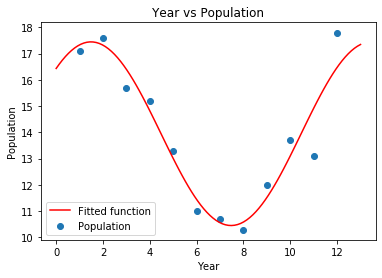

The equation of regression line is y=3.497 * cos(0.525(x-1.487))+13.950


In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

month=np.arange(1,13)
temp=np.array([17.1,17.6,15.7,15.2,13.3,11,10.7,10.3,12,13.7,13.1,17.8])


def cosfunc(x, a, b, c, d):
    return a * np.cos(b * (x - np.radians(c)))+d


popt, pcov = curve_fit(cosfunc, month, temp, p0=[4,0.5,1,10])
x_data = np.linspace(0, 13, num=100)
plt.plot(x_data, cosfunc(x_data, *popt), 'r-',label='Fitted function')

plt.scatter(month,temp,label='Population')
plt.title("Year vs Population")
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

a, b, c, d = popt

print(f'The equation of regression line is y={a:.3f} * cos({b:.3f}(x-{np.radians(c):.3f}))+{d:.3f}')


You may have different coefficients. I used `p0=[4,0.5,1,10]`. You can find [my solution here](https://github.com/shinokada/python-for-ib-diploma-mathematics/blob/master/Modelling_functions.ipynb).

# Logistic models

$
y=\frac{L}{1+Ce^{-kx}}, L,k,C>0
$


We set up data and plot a scatter diagram. We set the domain from -10 to 10 and range from 0 to 250, using `plt.xlim` and `plt.ylim`. We are going to use `scipy.optimize.curve_fit` for the logistic regression.

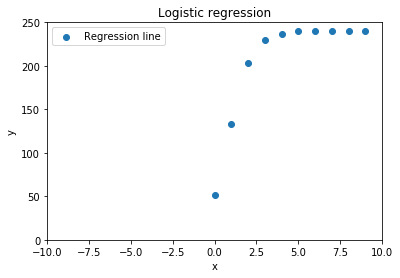

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

x=np.arange(0,10)
y=np.array([52,133,203,230,237,239.5,239.8,239.9,240,240])

plt.scatter(x, y, label='Regression line')
plt.title("Logistic regression")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10,10)
plt.ylim(0,250)
plt.legend()
plt.show()

We define our logistic function using `logifunc`. We find the function parameter in `popt` using `curve_fit`. For the regression line, we set a new domain for the function, `x_data` from -10 to 10. We plot the line using `plt.plot`.

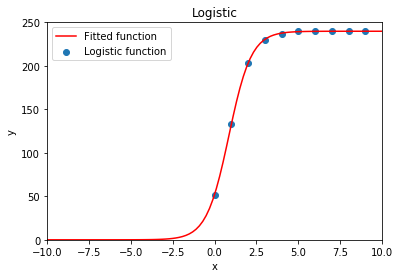

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

x=np.arange(0,10.0)
y=np.array([52,133,203,230,237,239.5,239.8,239.9,240,240])

def logifunc(x,l,c,k):
    return l / (1 + c*np.exp(-k*x))

popt, pcov = curve_fit(logifunc, x, y, p0=[200,1,1])
x_data = np.linspace(-10, 10, num=100)
plt.plot(x_data, logifunc(x_data, *popt), 'r-',label='Fitted function')

plt.scatter(x,y,label='Logistic function')
plt.title("Logistic")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10,10)
plt.ylim(0,250)
plt.legend()
plt.show()

# Conclusion


`scipy.optimize.curve_fit` was useful for many functions. The only problem was to find good initial values in `p0`. Sometimes different `p0` values return different `popt`. You can try [LMFIT](https://lmfit.github.io/lmfit-py/). 




# Reference

- https://realpython.com/linear-regression-in-python/
- https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python